In [153]:
import json
import matplotlib.pyplot as plt
import astropy.table as table
import numpy as np
import astropy.time as time
import spectres

In [211]:
with open('../data/comparison/PTF10vgv.json', 'r') as f:
    dat = json.load(f)
sne_name = list(dat.keys())[0]

In [214]:
phot = dat[sne_name]['photometry']
specs = dat[sne_name]['spectra']
print(dat[sne_name]['maxvisualdate'][0]['value'].replace('/','-'))
max_v_mjd = time.Time('2010-09-14').mjd+10
dat[sne_name]['spectra'][0]

2010-09-13


{'time': '55455.3',
 'filename': 'ptf10vgv-20100916.323-ui.flm',
 'instrument': 'Kast',
 'observer': 'Brad Cenko, Michael Kandrashoff',
 'reducer': 'Io Kleiser',
 'snr': '35.8943',
 'u_errors': 'Uncalibrated',
 'u_fluxes': 'Uncalibrated',
 'u_time': 'MJD',
 'u_wavelengths': 'Angstrom',
 'data': [['3440.00', '0.282714', '0.0348756'],
  ['3442.00', '0.304335', '0.0348282'],
  ['3444.00', '0.300868', '0.0350583'],
  ['3446.00', '0.285956', '0.0350676'],
  ['3448.00', '0.286132', '0.0350848'],
  ['3450.00', '0.259820', '0.0352474'],
  ['3452.00', '0.272013', '0.0354959'],
  ['3454.00', '0.274179', '0.0352885'],
  ['3456.00', '0.310012', '0.0357068'],
  ['3458.00', '0.250254', '0.0352165'],
  ['3460.00', '0.268248', '0.0354358'],
  ['3462.00', '0.271135', '0.0353269'],
  ['3464.00', '0.249848', '0.0353465'],
  ['3466.00', '0.275248', '0.0357949'],
  ['3468.00', '0.275043', '0.0358053'],
  ['3470.00', '0.327195', '0.0361978'],
  ['3472.00', '0.308704', '0.0360984'],
  ['3474.00', '0.299157',

In [79]:
ntt_spec = table.Table.read("../data/specs/preproc_marshall/ZTF19abqwtfu_20190823_NTT_v1.ascii", format='ascii')

[ 3440.  3442.  3444. ... 10124. 10126. 10128.]
[0.282714  0.304335  0.300868  ... 0.0865085 0.0995056 0.125051 ]


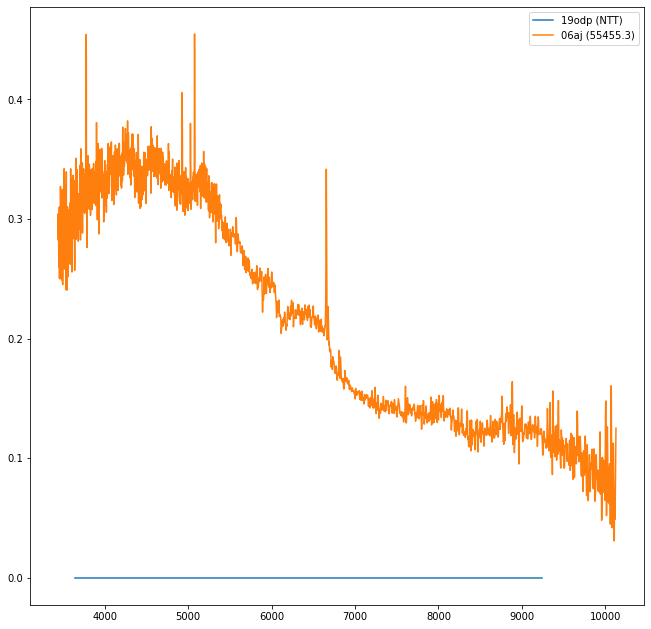

In [80]:
plt.figure(figsize=(11,11))
plt.plot(ntt_spec['col1'], ntt_spec['col2'], label='19odp (NTT)')
def plot_spec(i):
    x = specs[i]
    data = x['data']
    t = x['time']
    wave = np.array([float(y[0]) for y in data])
    flux = np.array([float(y[1]) for y in data])
    print(wave)
    print(flux)
    plt.plot(wave, flux, label='06aj (%s)' % t)

plot_spec(0)
plt.legend()

In [209]:
with open('../data/comparison/PTF10vgv.json', 'r') as f:
    dat = json.load(f)
sne_name = list(dat.keys())[0]

phot = dat[sne_name]['photometry']
specs = dat[sne_name]['spectra']
print(dat[sne_name]['maxvisualdate'])
max_v_mjd = time.Time('2010-09-14').mjd+10
dat[sne_name]['spectra'][0]

def normalize(wave, flux):
    idx = np.logical_and(wave > 5300, wave < 6000)
    mean_flux = np.nanmean(flux[idx])
    return flux/mean_flux

plt.figure(figsize=(11,11))
ntt_wave = ntt_spec['col1']
wave_grid = np.linspace(ntt_wave.min(), ntt_wave.max(), 300)
new_flux = spectres.spectres(wave_grid, ntt_spec['col1'], ntt_spec['col2'])
#plt.plot(ntt_spec['col1'], normalize(ntt_spec['col1'], ntt_spec['col2']), label='19odp (NTT)')
plt.plot(wave_grid, normalize(wave_grid, new_flux), label='19odp (NTT)')
def plot_spec(i):
    x = specs[i]
    data = x['data']
    t = float(x['time'])
    wave = np.array([float(y[0]) for y in data])#/(1+0.015)
    flux = np.array([float(y[1]) for y in data])
    idx = wave > 3200
    wave_grid = np.linspace(wave[idx].min(), wave[idx].max(), 300)
    new_flux = spectres.spectres(wave_grid, wave, flux)
    
    print(wave)
    print(flux)
    plt.plot(wave_grid, normalize(wave_grid, new_flux), label='PTF10vgv (%.0f)' % (t-max_v_mjd))

plot_spec(0)
plt.legend()

[{'value': '2010/09/13', 'derived': True, 'source': '6,7,8'}]

Spectres: new_wavs contains values outside the range in spec_wavs, new_fluxes and new_errs will be filled with the value set in the 'fill' keyword argument. 


Spectres: new_wavs contains values outside the range in spec_wavs, new_fluxes and new_errs will be filled with the value set in the 'fill' keyword argument. 

[ 3440.  3442.  3444. ... 10124. 10126. 10128.]
[0.282714  0.304335  0.300868  ... 0.0865085 0.0995056 0.125051 ]


In [133]:
with open('../data/comparison/SN2008D.json', 'r') as f:
    dat = json.load(f)
sne_name = list(dat.keys())[0]

phot = dat[sne_name]['photometry']
specs = dat[sne_name]['spectra']
print(dat[sne_name]['maxvisualdate'])
max_v_mjd = time.Time('2008-01-28').mjd
dat[sne_name]['spectra'][1]

[{'value': '2008/01/29', 'derived': True, 'source': '4,17'}]


{'time': '54475',
 'filename': '2008D_20080110_3769_9650_00.dat',
 'u_errors': 'Uncalibrated',
 'u_fluxes': 'Uncalibrated',
 'u_time': 'MJD',
 'u_wavelengths': 'Angstrom',
 'data': [['3768.79315', '1.0246633e-16'],
  ['3770.418344', '1.056201646e-16'],
  ['3772.043538', '1.085866328e-16'],
  ['3773.668732', '1.115530877e-16'],
  ['3775.293926', '1.000703914e-16'],
  ['3776.91912', '8.858616655e-17'],
  ['3778.544314', '8.533471808e-17'],
  ['3780.169508', '8.208414974e-17'],
  ['3781.794702', '8.793320341e-17'],
  ['3783.419896', '9.378322984e-17'],
  ['3785.04509', '9.521830218e-17'],
  ['3786.670284', '9.665289806e-17'],
  ['3788.295478', '1.004939609e-16'],
  ['3789.920672', '1.043352817e-16'],
  ['3791.545866', '9.603228099e-17'],
  ['3793.17106', '8.772796335e-17'],
  ['3794.796254', '8.853978488e-17'],
  ['3796.421448', '8.935259902e-17'],
  ['3798.046642', '9.53249423e-17'],
  ['3799.671836', '1.012978414e-16'],
  ['3801.29703', '1.016811106e-16'],
  ['3802.922224', '1.020637578

[{'value': '2008/01/29', 'derived': True, 'source': '4,17'}]

Spectres: new_wavs contains values outside the range in spec_wavs, new_fluxes and new_errs will be filled with the value set in the 'fill' keyword argument. 

Filename: 2008D_20080110_3769_9650_00.dat

Spectres: new_wavs contains values outside the range in spec_wavs, new_fluxes and new_errs will be filled with the value set in the 'fill' keyword argument. 


Spectres: new_wavs contains values outside the range in spec_wavs, new_fluxes and new_errs will be filled with the value set in the 'fill' keyword argument. 

[3768.79315  3770.418344 3772.043538 ... 9647.119848 9648.745042
 9650.370236]
[1.02466330e-16 1.05620165e-16 1.08586633e-16 ... 2.72210763e-17
 2.68538727e-17 2.64882026e-17]


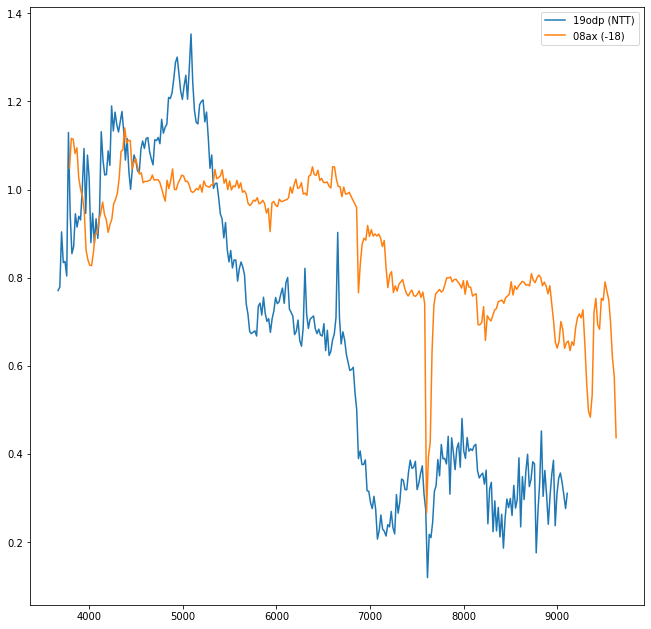

In [215]:
with open('../data/comparison/SN2008D.json', 'r') as f:
    dat = json.load(f)
sne_name = list(dat.keys())[0]

phot = dat[sne_name]['photometry']
specs = dat[sne_name]['spectra']
print(dat[sne_name]['maxvisualdate'])
max_v_mjd = time.Time('2008-01-28').mjd
dat[sne_name]['spectra'][1]

def normalize(wave, flux):
    idx = np.logical_and(wave > 3400, wave < 6000)
    mean_flux = np.nanmean(flux[idx])
    return flux/mean_flux


plt.figure(figsize=(11,11))
ntt_wave = ntt_spec['col1']/(1+0.0143)
wave_grid = np.linspace(ntt_wave.min(), ntt_wave.max(), 300)
new_flux = spectres.spectres(wave_grid, ntt_spec['col1'], ntt_spec['col2'])
#plt.plot(ntt_spec['col1'], normalize(ntt_spec['col1'], ntt_spec['col2']), label='19odp (NTT)')
plt.plot(wave_grid, normalize(wave_grid, new_flux), label='19odp (NTT)')
def plot_spec(i):
    x = specs[i]
    print('Filename: %s' % x['filename'])
    data = x['data']
    t = float(x['time'])
    wave = np.array([float(y[0]) for y in data])#/(1+0.015)
    flux = np.array([float(y[1]) for y in data])
    idx = wave > 3200
    wave_grid = np.linspace(wave[idx].min(), wave[idx].max(), 400)
    new_flux = spectres.spectres(wave_grid, wave, flux)
    
    idx = wave > 3200
    wave_grid = np.linspace(wave[idx].min(), wave[idx].max(), 300)
    new_flux = spectres.spectres(wave_grid, wave, flux)
    
    print(wave)
    print(flux)
    plt.plot(wave_grid, normalize(wave_grid, new_flux), label='08ax (%.0f)' % (t-max_v_mjd))

plot_spec(1)
#plot_spec(7)
plt.legend()

In [205]:
with open('../data/comparison/SN2008ax.json', 'r') as f:
    dat = json.load(f)
sne_name = list(dat.keys())[0]

phot = dat[sne_name]['photometry']
specs = dat[sne_name]['spectra']
print(dat[sne_name]['maxvisualdate'])
max_v_mjd = time.Time('2008-03-22').mjd
dat[sne_name]['spectra'][1]

def normalize(wave, flux):
    idx = np.logical_and(wave > 3400, wave < 6000)
    mean_flux = np.nanmean(flux[idx])
    return flux/mean_flux




plt.figure(figsize=(11,11))
ntt_wave = ntt_spec['col1']/(1+0.0143)
wave_grid = np.linspace(ntt_wave.min(), ntt_wave.max(), 300)
new_flux = spectres.spectres(wave_grid, ntt_spec['col1'], ntt_spec['col2'])
#plt.plot(ntt_spec['col1'], normalize(ntt_spec['col1'], ntt_spec['col2']), label='19odp (NTT)')
plt.plot(wave_grid, normalize(wave_grid, new_flux), label='19odp (NTT)')
def plot_spec(i):
    x = specs[i]
    data = x['data']
    t = float(x['time'])
    wave = np.array([float(y[0]) for y in data])#/(1+0.015)
    flux = np.array([float(y[1]) for y in data])
    idx = wave > 3200
    wave_grid = np.linspace(wave[idx].min(), wave[idx].max(), 300)
    new_flux = spectres.spectres(wave_grid, wave, flux)
    
    print(wave)
    print(flux)
    plt.plot(wave_grid, normalize(wave_grid, new_flux), label='08ax (%.0f)' % (t-max_v_mjd))

plot_spec(0)
#plot_spec(7)
plt.legend()

[{'value': '2008/03/20', 'derived': True, 'source': '11,16,17'}]

Spectres: new_wavs contains values outside the range in spec_wavs, new_fluxes and new_errs will be filled with the value set in the 'fill' keyword argument. 


Spectres: new_wavs contains values outside the range in spec_wavs, new_fluxes and new_errs will be filled with the value set in the 'fill' keyword argument. 

[3477.   3478.47 3479.94 ... 7415.13 7416.6  7418.07]
[0.56638211 0.70416826 1.039566   ... 0.75207418 0.71588939 0.71859556]
